# 시계열 데이터 불러오기

In [7]:
import pandas as pd

df = pd.read_csv("csv/market-price.csv",names = ['day', 'price'])
print(df.info(), df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None                      day        price
0    2017-08-27 00:00:00  4354.308333
1    2017-08-28 00:00:00  4391.673517
2    2017-08-29 00:00:00  4607.985450
3    2017-08-30 00:00:00  4594.987850
4    2017-08-31 00:00:00  4748.255000
..                   ...          ...
360  2018-08-22 00:00:00  6575.229167
361  2018-08-23 00:00:00  6434.881667
362  2018-08-24 00:00:00  6543.645714
363  2018-08-25 00:00:00  6719.429231
364  2018-08-26 00:00:00  6673.274167

[365 rows x 2 columns]


day가 1일 단위로 나뉘어 있는 모습을 확인할 수 있다. 해당 데이터의 타입을 object타입에서 시계열 단위로 바꿔주고 이 열을 인덱스로 사용해본다.

In [8]:
df["day"] = pd.to_datetime(df["day"])
print(df.info())
df.set_index('day', inplace=True)
print(df.info(), df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     365 non-null    datetime64[ns]
 1   price   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-08-27 to 2018-08-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB
None                   price
day                    
2017-08-27  4354.308333
2017-08-28  4391.673517
2017-08-29  4607.985450
2017-08-30  4594.987850
2017-08-31  4748.255000
...                 ...
2018-08-22  6575.229167
2018-08-23  6434.881667
2018-08-24  6543.645714
2018-08-25  6719.429231
2018-08-26  6673.274167

[365 rows x 1 columns]


그래프로 그려서 확인해보기

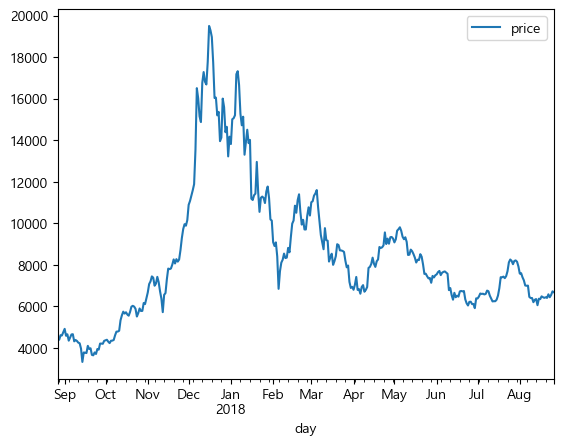

In [11]:
import matplotlib.pyplot as plt

df.plot()
plt.show()

# 시계열 분해하기

In [15]:
import statsmodels.api as sm

- 가법 모델로 분해하기

C:\anaconda\envs\da\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\anaconda\envs\da\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


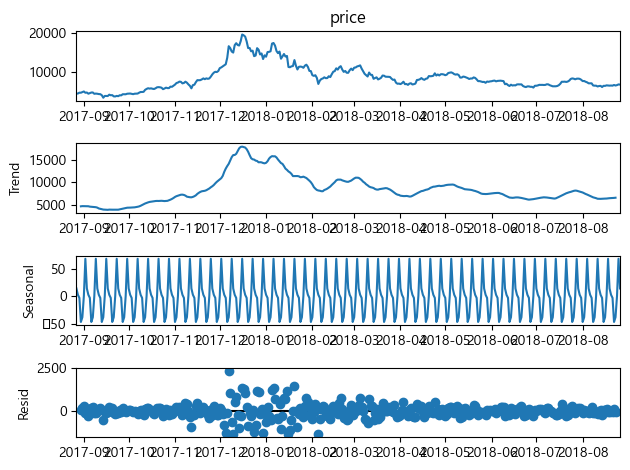

In [27]:
result = sm.tsa.seasonal_decompose(df["price"], model = "additive")
result.plot()
plt.show()

In [29]:
result.trend

day
2017-08-27            NaN
2017-08-28            NaN
2017-08-29            NaN
2017-08-30    4598.476807
2017-08-31    4640.455614
                 ...     
2018-08-22    6501.864919
2018-08-23    6540.323609
2018-08-24            NaN
2018-08-25            NaN
2018-08-26            NaN
Name: trend, Length: 365, dtype: float64

In [30]:
result.seasonal

day
2017-08-27    14.573619
2017-08-28     3.012504
2017-08-29    -2.687809
2017-08-30   -46.671846
2017-08-31   -37.974864
                ...    
2018-08-22   -46.671846
2018-08-23   -37.974864
2018-08-24     0.967942
2018-08-25    68.780454
2018-08-26    14.573619
Name: seasonal, Length: 365, dtype: float64

- 승법 모델로 분해하기

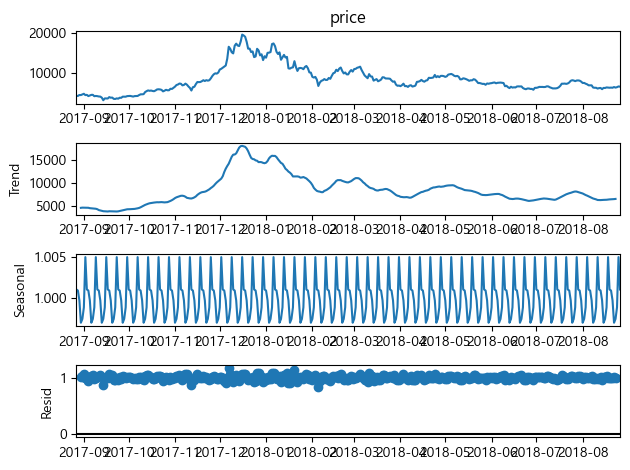

In [28]:
result2 = sm.tsa.seasonal_decompose(df["price"], model = "multiplicative")
result2.plot()
plt.show()

In [31]:
result2.trend

day
2017-08-27            NaN
2017-08-28            NaN
2017-08-29            NaN
2017-08-30    4598.476807
2017-08-31    4640.455614
                 ...     
2018-08-22    6501.864919
2018-08-23    6540.323609
2018-08-24            NaN
2018-08-25            NaN
2018-08-26            NaN
Name: trend, Length: 365, dtype: float64

In [32]:
result2.seasonal

day
2017-08-27    1.001050
2017-08-28    1.000922
2017-08-29    0.999722
2017-08-30    0.996989
2017-08-31    0.997452
                ...   
2018-08-22    0.996989
2018-08-23    0.997452
2018-08-24    0.998866
2018-08-25    1.005001
2018-08-26    1.001050
Name: seasonal, Length: 365, dtype: float64